![](img/banner.png)
%%HTML
<script src="require.js"></script>

## Images Clustering 

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

In [ ]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/mfds'):
    !git clone https://github.com/fum-cs/mfds.git
    %cd mfds/notebooks

<div dir="rtl">
•  ابتدا، تمام تصاویر jpg را از یک پوشه مشخص خوانده و به آرایه های NumPy تبدیل میکند.

•  سپس، میانگین شدت رنگ پیکسلهای هر تصویر را به دست میآورد و یک بردار سه بعدی از آنها میسازد.

•  سپس، از الگوریتم k-means از کتابخانه scikit-learn برای خوشه بندی بردارهای میانگین استفاده میکند. شما میتوانید تعداد خوشه ها را به دلخواه خود تنظیم کنید.

•  در نهایت، تصاویر هر خوشه را با استفاده از کتابخانه matplotlib نمایش میدهد.
</div>

In [2]:
# وارد کردن کتابخانه های مورد نیاز
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from skimage.color import rgb2lab
from skimage import transform, io

# تعریف پوشه ای که تصاویر jpg در آن قرار دارند
folder = "images"

# خواندن تصاویر و تبدیل آنها به آرایه های NumPy
images = []
for filename in os.listdir(folder):
    # if filename.endswith(".jpg"):
        img = Image.open(os.path.join(folder, filename))
        img = np.array(img)
        images.append(img)

In [3]:
img.shape

(120, 160, 3)

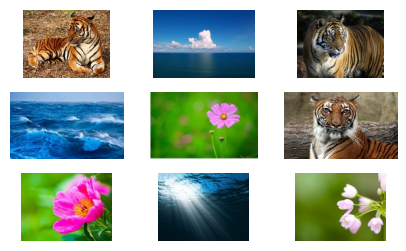

In [4]:
# تعداد تصاویر
n = len(images)

plt.figure(figsize=(5, 3))
# حلقه برای نمایش تصاویر
for j in range(n):
    # ایجاد یک زیر شکل برای هر تصویر
    plt.subplot(3, n//3, j + 1)
    # حذف محورها
    plt.axis("off")
    # نمایش تصویر
    plt.imshow(images[j])
# نمایش شکل
plt.show()

(9, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


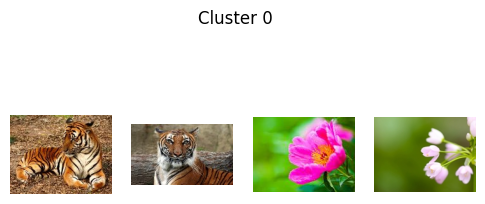

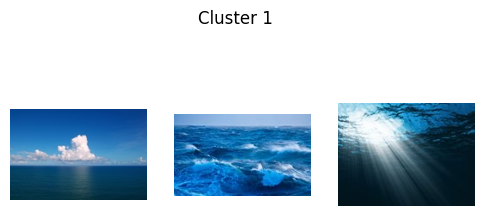

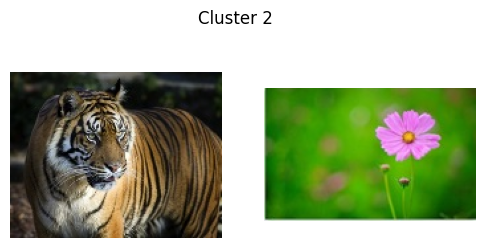

In [5]:
# محاسبه میانگین شدت رنگ پیکسلهای هر تصویر
means = []
for img in images:
    # img = rgb2hsv(img)
    # img = rgb2lab(img)
    mean = np.mean(img, axis=(0, 1)) # میانگین بر اساس محورهای ارتفاع و عرض
    means.append(mean)

# تبدیل لیست میانگینها به آرایه NumPy
X = np.array(means)
print(X.shape)
# خوشهبندی بردارهای میانگین با الگوریتم k-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_ # برچسب خوشه ها

# نمایش تصاویر هر خوشه
for i in range(k):
    # انتخاب تصاویری که به خوشه i تعلق دارند
    cluster = [images[j] for j in range(n) if labels[j] == i]
    # تعداد تصاویر در خوشه i
    m = len(cluster)
    # تعیین اندازه شکل برای نمایش تصاویر
    plt.figure(figsize=(6, 3))
    # حلقه برای نمایش تصاویر
    for j in range(m):
        # ایجاد یک زیر شکل برای هر تصویر
        plt.subplot(1, m, j + 1)
        # حذف محورها
        plt.axis("off")
        # نمایش تصویر
        plt.imshow(cluster[j])
    # نمایش عنوان شکل
    plt.suptitle(f"Cluster {i}")
    # نمایش شکل
    plt.show()

خوشه‌بندی تصاویر در فضای با ابعاد بالا

In [6]:
mean.shape

(3,)

In [7]:
print(img.shape)
resized_image = transform.resize(img, (100, 100))
print(resized_image.shape)
flatted_image = resized_image.reshape(100*100,3)
print(flatted_image.shape)
print(resized_image[0,0,:])
print(flatted_image[0])

flatted_image = resized_image.reshape(100*100*3)
print(flatted_image.shape)
print(resized_image[0,0,:])
print(flatted_image[:3])

(120, 160, 3)
(100, 100, 3)
(10000, 3)
[0.56470588 0.67689584 0.38695552]
[0.56470588 0.67689584 0.38695552]
(30000,)
[0.56470588 0.67689584 0.38695552]
[0.56470588 0.67689584 0.38695552]


(9, 30000)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


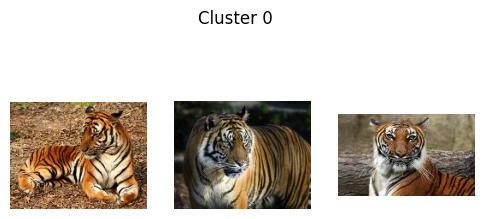

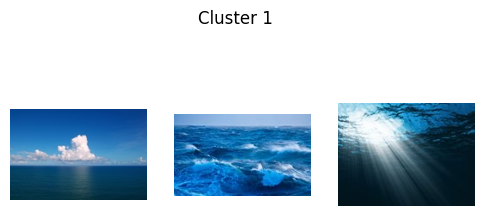

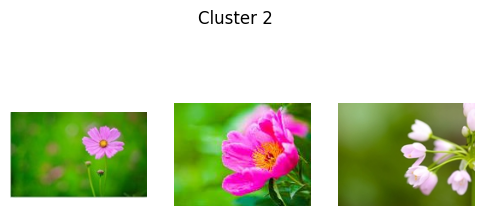

In [8]:
# تغییر اندازه تصویر به 100 در 100 پیکسل
flatted_images = []
for img in images:
    img = rgb2hsv(img)
    # img = rgb2lab(img)
    resized_image = transform.resize(img, (100, 100))
    flatted_images.append(resized_image.reshape(100*100*3))

X = np.array(flatted_images)
print(X.shape)
# خوشه بندی بردارهای میانگین با الگوریتم k-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_ # برچسب خوشه ها

# نمایش تصاویر هر خوشه
for i in range(k):
    # انتخاب تصاویری که به خوشه i تعلق دارند
    cluster = [images[j] for j in range(n) if labels[j] == i]
    # تعداد تصاویر در خوشه i
    m = len(cluster)
    # تعیین اندازه شکل برای نمایش تصاویر
    plt.figure(figsize=(6, 3))
    # حلقه برای نمایش تصاویر
    for j in range(m):
        # ایجاد یک زیر شکل برای هر تصویر
        plt.subplot(1, m, j + 1)
        # حذف محورها
        plt.axis("off")
        # نمایش تصویر
        plt.imshow(cluster[j])
    # نمایش عنوان شکل
    plt.suptitle(f"Cluster {i}")
    # نمایش شکل
    plt.show()